<a href="https://colab.research.google.com/github/avilapaz/Data_Science/blob/master/AnaliseAirbnbParis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise dos Dados do Airbnb - PARIS**


O Airbnb surgiu em meados de 2008 como uma alternativa à hospedagem em hotéis e pousadas e rapidamente se expandiu no mundo inteiro como um serviço online para anúncio e reservas de meios de hospedagem (desde simples quartos até casas inteiras).


A abreviação bnb significa "bed and breakfast" e inicialmente o site era utilizado apenas para aluguel de quartos em casa, mas o negócio prosperou e passou a oferecer aluguel de apartamentos e casas.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Através do portal Inside Airbnb, é possível encontrar dados de várias cidades no mundo, o que permite o desenvolvimento de projetos, análises e entrega de soluções em Data Science.

Neste notebook, serão analisados os dados referentes à cidade de **PARIS** e apresentadas algumas considerações extraídas a partir dos dados brutos.

## **Obtenção dos Dados**

Os dados desse notebook foram obtidos a partir do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) e para as análises utilizou-se o arquivo *listings.csv* - Summary information and metrics for listings in Paris (good for visualisations).

Essa fase consiste e importar os pacotes necessários e importar o arquivo csv para um DataFrame

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
df = pd.read_csv("http://data.insideairbnb.com/france/ile-de-france/paris/2020-04-15/visualisations/listings.csv")

# **Análise dos Dados**

Dicionário de Variáveis:


*   ID - número para identificar o imóvel
*   NAME - nome da propriedade
*   HOST_ID - número de identificação do anfitrião
*   HOST_NAME - nome do anfitrião
*   NEIGHBOURHOOD_GROUP - esta coluna nao contém nenhum valor válido
*   NEIGHBOURHOOD - bairro
*   LATITUDE - coordenada de latitude da propriedade
*   LONGITUDE -  coordenada de longitude da propriedade
*   ROOM_TYPE - tipo de quarto que é oferecido
*   PRICE - preço do aluguel
*   MINIMUM-NIGHTS - quantidade mínima de noites que pode reservar
*   NUMBER_OF_REVIEWS - quantidade de avaliações que a propriedade possui
*   LAST_REVIEW - data da última avaliação
*   REVIEWS_PER_MONTH - quantidade de avalições por mês
*   CALCULATED_HOST_LISTINGS_COUNT - quantidade de imóveis do mesmo anfitrião
*   AVAILABILITY_365 - quantidade de dias disponíveis dentro de 365 dias





Antes da análise, vamos verificar nosso dataset com as 5 (cinco) primeiras entradas

In [22]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3109,zen and calm,3631,Anne,NaN,Observatoire,48.83349,2.31852,Entire home/apt,60,2,9,2019-10-24,0.22,1,365
1,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85100,2.35869,Entire home/apt,115,1,220,2020-03-22,1.67,1,86
2,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85758,2.35275,Entire home/apt,119,10,268,2020-02-26,2.44,2,282
3,7964,Large & sunny flat with balcony !,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,130,6,6,2015-09-14,0.05,1,308
4,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",28422,Bernadette,NaN,Louvre,48.85899,2.34735,Entire home/apt,75,180,0,NaN,NaN,1,50


**Questão 1: quantas variáveis e quantas entradas o conjunto de dados possui? Quais os tipos das variáveis?**

In [23]:
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))
display(df.dtypes)

Entradas:	 59322
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**Questão 2: Qual o percentual de valores ausentes no dataset?**

Em um dataset é importante que seja verificada a existência de valores ausentes para que eles não gerem distorções na análise dos dados.

Dessa forma, observa-se que:


*   A variável neighbourhood_group possui 100% dos seus valores ausentes.
*   As variáveis reviews_per_month e last_rewiew possuem 20% de valores ausentes, perfeitamente entendível, uma vez que nem todas as pessoas deixam comentários sobre a hospedagem.
*   No geral, o dataset está bem completo




In [24]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.205876
last_review                       0.205876
name                              0.001045
host_name                         0.000169
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

**Questão 3: Qual o tipo de distribuição das variáveis?**

Para analisar essa questão, faz-se necessário plotar histogramas das variáveis numéricas.

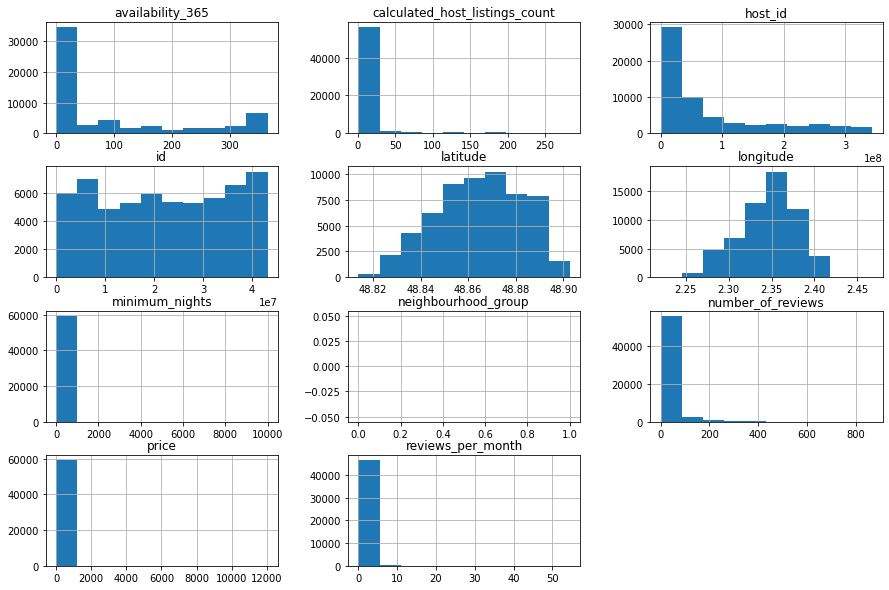

In [25]:
df.hist(figsize=(15,10));

**Questão 4: Há presença de outliers?**

Outliers são valores que não seguem uma distribuição e acabam por distorcer a representação gráfica. 

Através da visualização dos gráficos acima é possível verificar que as variavéis ***price, reviews_per_month, minimum_nights, number_of_reviews indicam a presença de outliers***.

Para confirmar, pode-se:

*   Empreender um resumo estatístico de todas as variáveis através do describe().
*   Plotar um gráfico *boxplot* para as variáveis em questão.





In [26]:
df[['price','reviews_per_month','minimum_nights', 'number_of_reviews']].describe()

,price,reviews_per_month,minimum_nights,number_of_reviews
count,59322.0000,47109.000000,59322.000000,59322.000000
mean,132.7507,0.968355,5.463487,20.964010
std,332.7486,1.249269,46.182731,42.969181
min,0.0000,0.010000,1.000000,0.000000
25%,60.0000,0.200000,1.000000,1.000000
50%,85.0000,0.550000,2.000000,6.000000
75%,128.0000,1.270000,4.000000,21.000000
max,12039.0000,54.450000,9999.000000,867.000000


Analisando-se a descrição estatística das variáveis, nota-se que o **preço** máximo é de 12.039 euros, no entanto 75% dos valores estão abaixo de 128 euros e que a **quantidade mínima de noites** possui valor acima de 365 dias.

***BOXPLOT* para a quantidade mínima de noites (minimum_nights)**

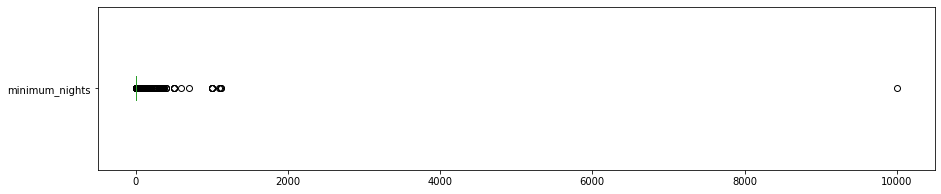

In [27]:
df.minimum_nights.plot(kind='box',vert=False, figsize=(15,3));
plt.show()

Ver quantidade de entradas acima de 30 dias para minimum_nights

In [28]:
print("minimum_nights valores acima de 30 dias:")
print("{} entradas".format(len(df[df.minimum_nights>30])))
print("{:.4f}%".format((len(df[df.minimum_nights>30])/df.shape[0])*100))

minimum_nights valores acima de 30 dias:
877 entradas
1.4784%


***BOXPLOT* para o preço (price)**

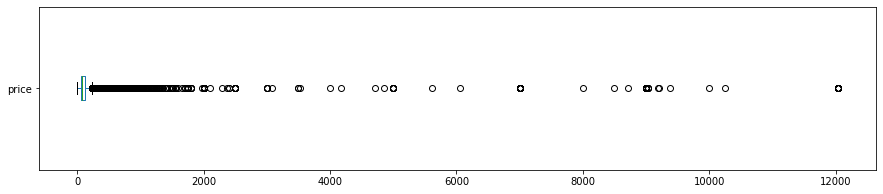

In [29]:
df.price.plot(kind='box',vert=False,figsize=(15,3));
plt.show()

Ver a quantidade de hospedagens com preços acima de 1500 euros

In [30]:
print("Quantidade de valores acima de 1.500 euros:")
print("{} entradas".format(len(df[df.price>1500])))
print("{:.4f}%".format((len(df[df.price>1500])/df.shape[0])*100))

Quantidade de valores acima de 1.500 euros:
124 entradas
0.2090%


Ver a quantidade de hospedagens com preços abaixo de 1500 euros

In [31]:
print("Quantidade de valores abaixo de 1.500 euros:")
print("{} entradas".format(len(df[df.price<1500])))
print("{:.4f}%".format((len(df[df.price<1500])/df.shape[0])*100))

Quantidade de valores abaixo de 1.500 euros:
59190 entradas
99.7775%


Histograma sem outliers

Verificado que o preço (price) e o número mínimo de noites (minimum_nights) possuem outliers, é interessante limpar o DataFrame dessas variáveis e plotar novamente o histograma.

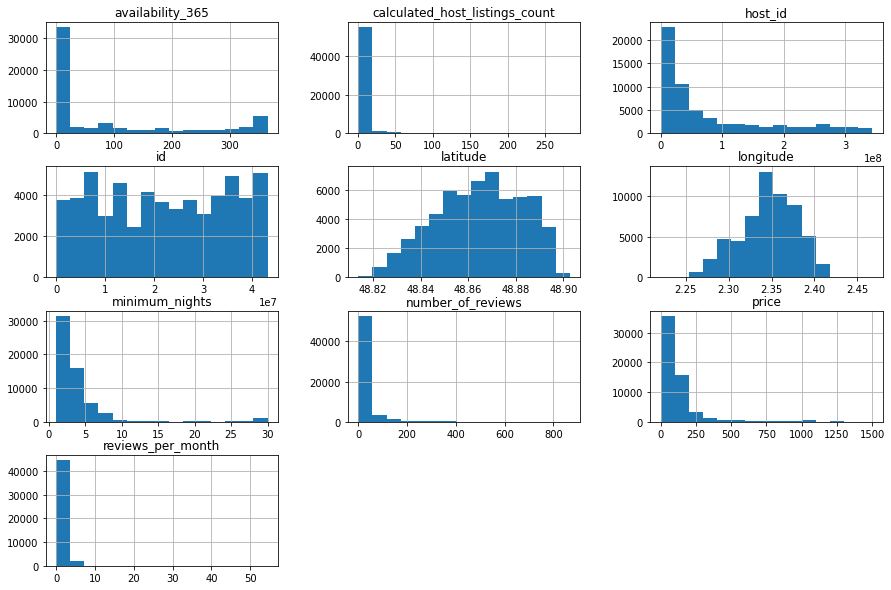

In [32]:
df_clean=df.copy()
df_clean.drop(df_clean[df_clean.price>1500].index,axis=0,inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights>30].index,axis=0,inplace=True)
df_clean.drop('neighbourhood_group',axis=1,inplace=True)
df_clean.hist(bins=15,figsize=(15,10));

**Questão 5: Qual a correlação existente entre as variáveis?**

Correlação entre variáveis significa que uma tem relação direta com a outra.
Para descobrir se existe alguma correlação entre variáveis vamos: criar uma matriz de correlação e, a partir desta gerar um *heatmap* a partir da biblioteca do *seaborn*



In [33]:
corr=df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.003128,-0.010880,0.046931,0.181210,0.289876
minimum_nights,0.003128,1.000000,-0.043827,-0.115416,0.048050,0.119564
number_of_reviews,-0.010880,-0.043827,1.000000,0.668031,-0.044466,0.230258
reviews_per_month,0.046931,-0.115416,0.668031,1.000000,0.009974,0.274444
calculated_host_listings_count,0.181210,0.048050,-0.044466,0.009974,1.000000,0.215018
availability_365,0.289876,0.119564,0.230258,0.274444,0.215018,1.000000


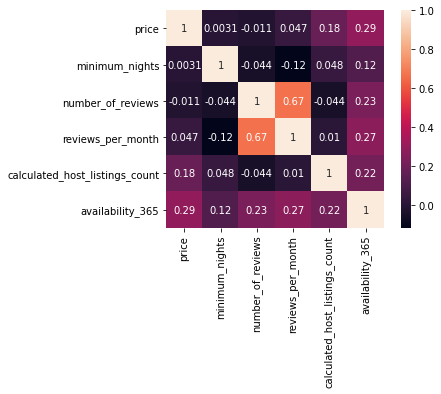

In [34]:
sns.heatmap(corr,square=True,linecolor='white',annot=True);

**Questão 6: Qual o tipo de imóvel mais alugado no Airbnb?**

Existem muitas opções de aluguel no Airbnb: quarto, quarto compartilhado, apartamento, casa.
Vamos descobrir qual o tipo de imóvel é mais alugado, utilizando o contador de ocorrências da variável room_type.

In [35]:
df_clean.room_type.value_counts()

Entire home/apt    50380
Private room        6267
Hotel room          1282
Shared room          396
Name: room_type, dtype: int64

Vamos ver qual o percentual de cada tipo de imóvel:



In [36]:
(df_clean.room_type.value_counts()/df_clean.shape[0])*100

Entire home/apt    86.378054
Private room       10.744964
Hotel room          2.198028
Shared room         0.678954
Name: room_type, dtype: float64

**Questão 7: Qual a localidade mais cara em Paris?**

Vamos comparar o preço de locação dos imóveis para descobrir qual o *arrondissement* (bairro) mais caro de Paris.

In [37]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Élysée            241.247995
Louvre            185.757430
Luxembourg        179.947550
Palais-Bourbon    176.235891
Passy             166.650189
Hôtel-de-Ville    159.127152
Temple            153.867647
Bourse            151.043251
Opéra             148.964632
Panthéon          132.928079
Name: price, dtype: float64

Foram analisados os 10 bairros com valor de aluguel mais caro e como pode se observar não há nenhuma anormalidade, os bairros mais caros são os bairros mais ao centro da cidade de Paris.

Como o dataset possui as varíaveis de latitude e longitude, é possível plotar um gráfico mostrando a localização dos imóveis. Vamos utilizar a variável longitude no eixo X e latitude no eixo Y

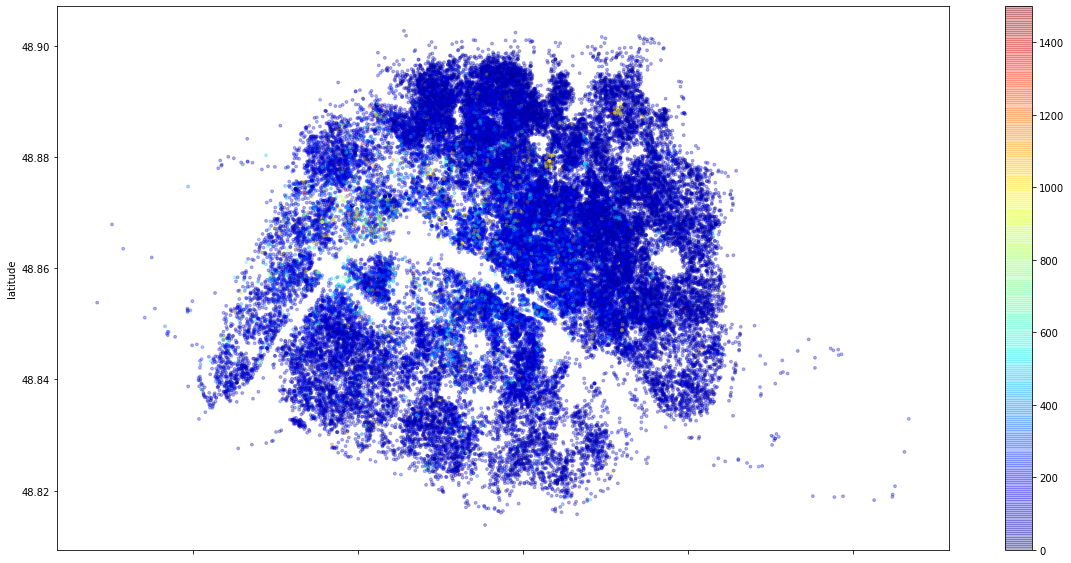

In [38]:
df_clean.plot(kind='scatter',x='longitude',y='latitude',alpha=0.3,c=df_clean.price,cmap=plt.get_cmap('jet'),s=8,figsize=(20,10));

## **CONCLUSÕES**

Durante a análise dos dados retirados do portal Inside Airbnb, notou-se a existência de *outliers*, variáveis com informações faltando e outras sem relevância como *id, name, host_name, host_id*.
Após tratamento do *dataset*, observou-se que:


1.   O tipo de imóvel mais alugado é casa ou apto completo, representando 86%, com quartos em segundo lugar com 10%;
2.   Não foi verificada correlação relevante entre as variáveis;
3. Os bairros mais caros para aluguel são: os arredores da Avenida Champs-Élysées (onde também se encontra o palácio do Presidente da França),a região do Louvre (o maior museu do mundo) e a região dos Jardins de Luxembourg, todas áreas consideradas nobres, com grande potencial turístico (monumentos, museus, cafés, restaurantes, jardins etc).

Apesar dessas considerações, sabe-se que o *dataset* trabalhado foi uma versão resumida, apenas para análise inicial, pois o mesmo não considerou todos os 106 atributos existentes.




